# **Importação das bibliotecas e/ou módulos necessarios**

In [19]:
# Importar as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns


# **Importação dos dados**

para treinar este modelo corretamente, baixe o dataset deste site:
https://www.kaggle.com/datasets/yasserh/titanic-dataset

E coloque dentro da pasta de arquivos usados para rodar este programa

In [20]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv do Titanic
dados = pd.read_csv('/content/titanic.csv')
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Método de tratamento de células vazias**

In [21]:
# Correção das colunas faltantes em idade com a média
media = dados['Age'].mean()
dados['Age'].fillna( media,inplace=True)
dados.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


# **Graficos**

## Gráfico de dispersão

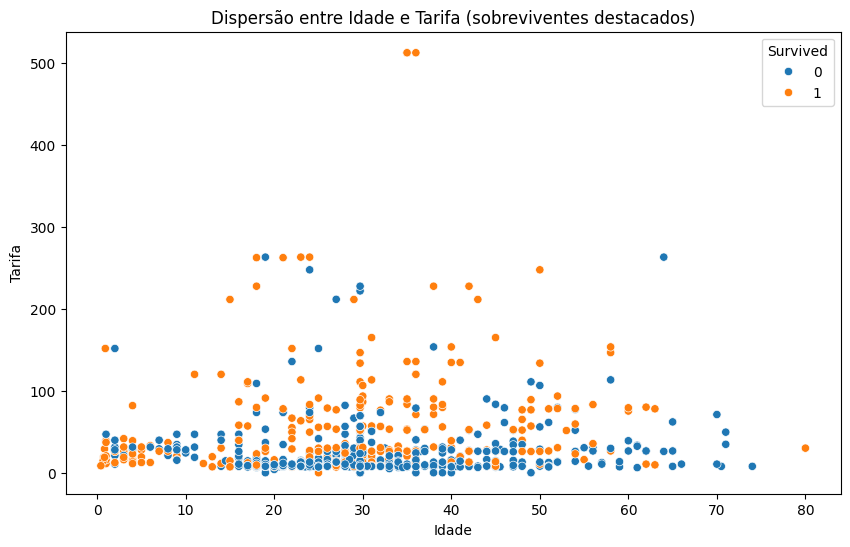

In [22]:
# Gráfico de dispersão entre idade e tarifa
plt.figure(figsize=(10, 6))
sns.scatterplot(dados, x='Age', y='Fare', hue='Survived')
plt.title('Dispersão entre Idade e Tarifa (sobreviventes destacados)')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

## Gráfico de barras

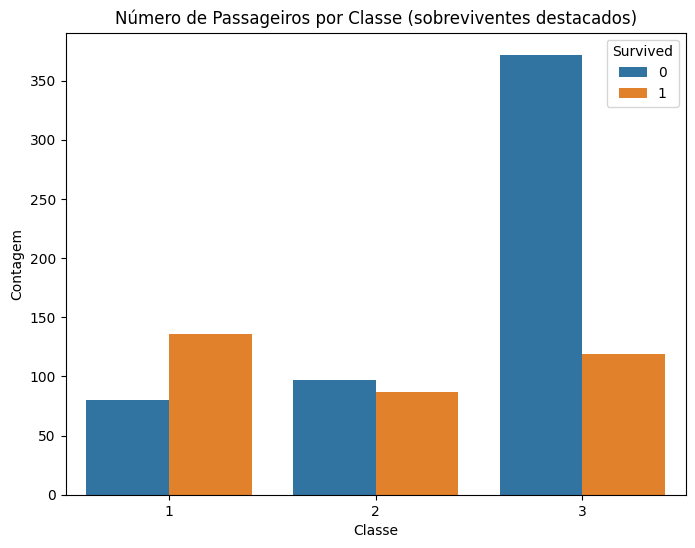

In [23]:
# Gráfico de barras para contar o número de passageiros por classe
plt.figure(figsize=(8, 6))
sns.countplot(dados, x='Pclass', hue='Survived')
plt.title('Número de Passageiros por Classe (sobreviventes destacados)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

## BoxPlot

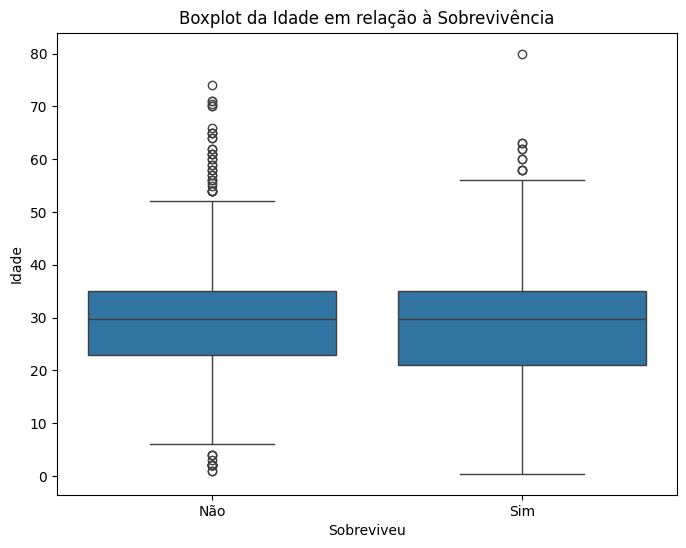

In [24]:
# Boxplot para análise da distribuição das idades
plt.figure(figsize=(8, 6))
sns.boxplot(dados, x='Survived', y='Age')
plt.title('Boxplot da Idade em relação à Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

## Histograma

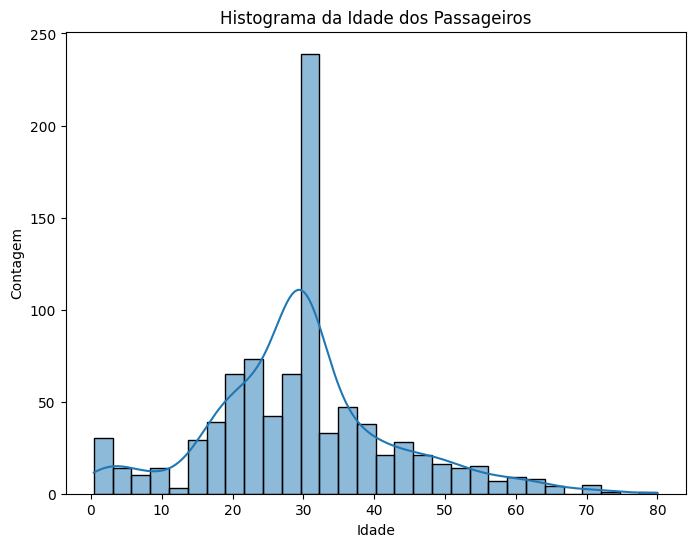

In [25]:
# Histograma da idade dos passageiros
plt.figure(figsize=(8, 6))
sns.histplot(dados, x='Age', bins=30, kde=True)
plt.title('Histograma da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

## Matriz de correlação

<ipython-input-26-ab96b23609fd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr()


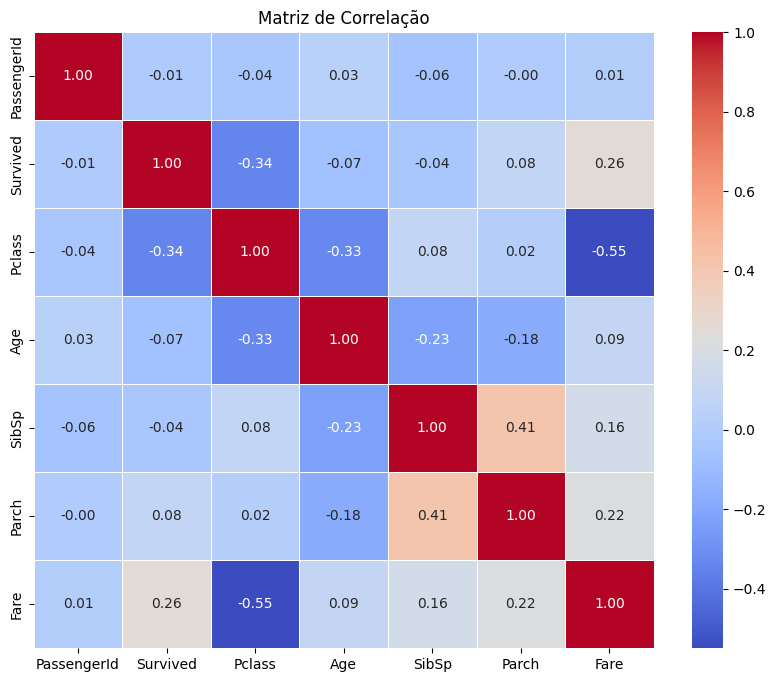

In [26]:
# Matriz de correlação entre as variáveis
plt.figure(figsize=(10, 8))
correlation_matrix = dados.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


# **Pré Processamento**



## retirada de dados de baixa relevância

In [27]:
# Remoção de daddos de baixa relevância
dados = dados.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked' ], axis=1)
dados

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


## Transformação de dados Categóricos

In [28]:
# Conversão de uma coluna de valores categóricos para numéricos
# Label Encoding
le = LabelEncoder()

dados['Sex'] = le.fit_transform(dados['Sex'])

## Separação dos dados de entrada e dados de saída



In [29]:
# X maiúsculo ----> Dados de entrada / Features / Variáveis independentes
# y minúsculo ----> Dados de saída / Target (alvo) / Variável dependente
# dados.iloc[linhas, colunas]
X = dados.iloc[:, 1:] # Todas as linhas e as colunas de 7 a 9.
X.head()

y = dados['Survived'].values


In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

,Pclass,Sex,Age,SibSp,Parch
445,1,1,4.000000,0,2
650,3,1,29.699118,0,0
172,3,0,1.000000,1,1
450,2,1,36.000000,1,2
314,2,1,43.000000,1,1
...,...,...,...,...,...
106,3,0,21.000000,0,0
270,1,1,29.699118,0,0
860,3,1,41.000000,2,0
435,1,0,14.000000,1,2


# **Escolha do algoritmo**

## Modelo KNN

In [31]:
# Instanciar o modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)


In [32]:
# Treinar o modelo
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Realizar as predições
y_predict = modelo_knn.predict(X_test)

In [34]:
# Calcular a acurácia do modelo
acuracia = 100 * (accuracy_score(y_test, y_predict))
print(f'A Acurácia do modelo baseado no algorítimo KNN é de {acuracia: .2f} %')

A Acurácia do modelo baseado no algorítimo KNN é de  77.61 %


In [35]:
# prompt: Faça o precision_score do modelo knn e exiba uma mensagem formatada

from sklearn.metrics import precision_score

# Calcular a precisão do modelo
precision = 100 * (precision_score(y_test, y_predict))

# Exibir uma mensagem formatada
print(f'A Precisão do modelo baseado no algorítimo KNN é de {precision: .2f} %')


A Precisão do modelo baseado no algorítimo KNN é de  80.00 %


In [36]:
# Recall para métricas KNN

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_predict)
print(f"O recall do nosso modelo KNN é de {recall: .3f}. Isso significa que ele identifica corretamente aproximadamente {recall * 100: .3f}% dos casos positivos")


O recall do nosso modelo KNN é de  0.613. Isso significa que ele identifica corretamente aproximadamente  61.261% dos casos positivos


In [37]:
# prompt: Faça a matriz de confusão do modelo knn com uma mensagem formatada dos valores positivo verdadeiro e os demais valores também

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(f'Verdadeiro Positivo (TP) {cm[0][0]}')
print(f'Verdadeiro Negativo (TN) {cm[1][1]}')
print(f'Falso Positivo (FP) {cm[0][1]}')
print(f'Falso Negativo (FN) {cm[1][0]}')

Verdadeiro Positivo (TP) 140
Verdadeiro Negativo (TN) 68
Falso Positivo (FP) 17
Falso Negativo (FN) 43


## DECISION TREE

In [38]:
# Instanciou e Treinou o modelo
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [39]:
# Predição
y_predict_tree = clf.predict(X_test)

In [40]:
# Calcular a acurácia do modelo
acuracia = 100 * (accuracy_score(y_test, y_predict_tree))
print(f'A Acurácia do modelo baseado no algorítimo Decision Tree é de {acuracia: .2f} %')

A Acurácia do modelo baseado no algorítimo Decision Tree é de  74.63 %


In [41]:
# prompt: Faça o precision_score do modelo decisionTree  e exiba uma mensagem formatada

precision = 100 * (precision_score(y_test, y_predict_tree))

# Exibir uma mensagem formatada
print(f'A Precisão do modelo baseado no algorítimo Decision Tree é de {precision: .2f} %')

A Precisão do modelo baseado no algorítimo Decision Tree é de  70.87 %


In [42]:
#Recall para as métricas do decision tree

recall = recall_score(y_test, y_predict_tree)
print(f"O recall do nosso modelo de decision tree é de {recall: .3f}. Isso significa que ele identifica corretamente aproximadamente {recall * 100: .3f}% dos casos positivos")


O recall do nosso modelo de decision tree é de  0.658. Isso significa que ele identifica corretamente aproximadamente  65.766% dos casos positivos


In [43]:
# prompt: Faça a matriz de confusão do modelo decisionTree com uma mensagem formatada dos valores positivo verdadeiro e os demais valores também

cm = confusion_matrix(y_test, y_predict_tree)
print(f'Verdadeiro Positivo (TP) {cm[0][0]}')
print(f'Verdadeiro Negativo (TN) {cm[1][1]}')
print(f'Falso Positivo (FP) {cm[0][1]}')
print(f'Falso Negativo (FN) {cm[1][0]}')

Verdadeiro Positivo (TP) 127
Verdadeiro Negativo (TN) 73
Falso Positivo (FP) 30
Falso Negativo (FN) 38


## Regressão logística

In [44]:
lr = LogisticRegression()

modelo_lr = lr.fit(X_train, y_train)

In [45]:
# Fazer previsões no conjunto de teste
y_pred_lr = modelo_lr.predict(X_test)

In [46]:
# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print("Precisão do modelo:", accuracy.round(4) * 100 , '%')

Precisão do modelo: 82.84 %


In [47]:
#Recall para metricas do LogisticRegression

recall = recall_score(y_test, y_pred_lr)
print(f"O recall do nosso modelo LogisticRegression é de {recall: .3f}. Isso significa que ele identifica corretamente aproximadamente {recall * 100: .3f}% dos casos positivos")


O recall do nosso modelo LogisticRegression é de  0.739. Isso significa que ele identifica corretamente aproximadamente  73.874% dos casos positivos


In [48]:
# prompt: Faça a matriz de confusão do modelo logisticRegression com uma mensagem formatada dos valores positivo verdadeiro e os demais valores também

cm = confusion_matrix(y_test, y_pred_lr)
print(f'Verdadeiro Positivo (TP) {cm[0][0]}')
print(f'Verdadeiro Negativo (TN) {cm[1][1]}')
print(f'Falso Positivo (FP) {cm[0][1]}')
print(f'Falso Negativo (FN) {cm[1][0]}')


Verdadeiro Positivo (TP) 140
Verdadeiro Negativo (TN) 82
Falso Positivo (FP) 17
Falso Negativo (FN) 29
